## 1. Import van libs

In [5]:
%load_ext autoreload
%autoreload 2

import os
from dotenv import load_dotenv

# Import GorgiasClient module from clients library

from clients import GorgiasClient

## 2. Configuraitie voor Gorgias API

In [6]:
# Load env vars
load_dotenv()

# Configuratie voor Gorgias API
config = {
    "domain": os.environ.get("GORGIAS_DOMAIN"),
    "username": os.environ.get("GORGIAS_USERNAME"),
    "api_key": os.environ.get("GORGIAS_API_KEY"),
}

# Validate elke key value pair, loopt door elke key value en pakt de key als de waarde None is.
missing = [key for key, value in config.items() if value is None]
if missing:
    raise ValueError(f"Missing environment variables: {', '.join(missing)}")

print(f"Configuration loaded. Domain: {config['domain']}, Username: {config['username']}")

Configuration loaded. Domain: northenoak.gorgias.com, Username: admin@northenoak.com


## 3. Maak Gorgias client instance en haal ticket details op

In [7]:
# Maak client instance, geeft client object van GorgiasClientClass terug dat gebruikt kan worden om requests te maken naar Gorgias API
client = GorgiasClient(
    domain=config["domain"],
    username=config["username"],
    api_key=config["api_key"]
)
print(f"✓ Gorgias client initialized for {config['domain']}")

try:
    
    ###### Stap 1 Tickets ophalen ######
    # Tickets ophalen met paginatie
    print("\nTickets ophalen...")
    tickets = client.paginate(
        endpoint="tickets",
        params={"order_by": "created_datetime:desc"},
        limit=100,
        max_pages=10  # Verwijder deze regel om ALLE tickets op te halen
    )

    print(f"\n✓ {len(tickets)} tickets opgehaald")
    print(f"  Aantal API-aanroepen: {client.request_count}")
    
    ###### Stap 2 Details ophalen per ticket ######
    
    # Tickets ophalen van de lijst met tickets
    # Voor elke ticket in tickets, pak de ticket id als die bestaat
    ticket_ids = [t["id"] for t in tickets if t.get("id")]
    
    #ticket_ids = ["34163798"]
    
    # Max aantal tickets om op te halen (None voor alle tickets)
    max_tickets = None  

    # Lijst om tickets met details op te slaan
    detailed_tickets = []

    # Bepaal welke ticket ids opgehaald moeten worden als de max_tickets is ingesteld
    ticket_ids_to_fetch = ticket_ids[:max_tickets] if max_tickets else ticket_ids
    print(f"\nDetails ophalen voor {len(ticket_ids_to_fetch)} tickets...")

    # Haal details op voor elk ticket id in ticket_ids_to_fetch
    # Voor elke ticket id, maak een GET request naar de tickets endpoint
    for ticket_idx, ticket_id in enumerate(ticket_ids_to_fetch):
        try:
            ticket = client.request("GET", f"tickets/{ticket_id}")
            # Voeg de opgehaalde ticket details toe aan de lijst
            detailed_tickets.append(ticket)
            # Print voortgang elke 10 tickets
            # Is ticket + 1 deelbaar door 10 zonder rest (omdat ticket bij 0 begint) print voortgang bij 10, 20, 30, etc.
            # Handig bij lange loops om voortgang te zien
            if (ticket_idx + 1) % 10 == 0:
                print(f"  Voortgang: {ticket_idx + 1}/{len(ticket_ids_to_fetch)} tickets")
                
        except Exception as e:
            print(f"  Fout bij ophalen ticket {ticket_id}: {e}")

finally:
    client.close()
    print(f"\n✓ Client closed. Total API calls: {client.request_count}")

✓ Gorgias client initialized for northenoak.gorgias.com

Tickets ophalen...
  Fetched page 1: 100 items (total: 100)
  Fetched page 2: 100 items (total: 200)
  Fetched page 3: 100 items (total: 300)
  Fetched page 4: 100 items (total: 400)
  Fetched page 5: 100 items (total: 500)
  Fetched page 6: 100 items (total: 600)
  Fetched page 7: 100 items (total: 700)
  Fetched page 8: 100 items (total: 800)
  Fetched page 9: 100 items (total: 900)
  Fetched page 10: 100 items (total: 1000)
  Stopped at max_pages=10

✓ 1000 tickets opgehaald
  Aantal API-aanroepen: 10

Details ophalen voor 1000 tickets...
  Voortgang: 10/1000 tickets
  Voortgang: 20/1000 tickets
  Voortgang: 30/1000 tickets
  Voortgang: 40/1000 tickets
  Voortgang: 50/1000 tickets
  Voortgang: 60/1000 tickets
  Voortgang: 70/1000 tickets
  Voortgang: 80/1000 tickets
  Voortgang: 90/1000 tickets
  Voortgang: 100/1000 tickets
  Voortgang: 110/1000 tickets
  Voortgang: 120/1000 tickets
  Voortgang: 130/1000 tickets
  Voortgang: 1

## 4 Controleer output voor ticket met ticket details

In [8]:
print(type(detailed_tickets)) 
print(type(detailed_tickets[0]))
print(detailed_tickets[:1])  # Print de eerste ticket met details als voorbeeld 

<class 'list'>
<class 'dict'>
[{'id': 38557361, 'uri': '/api/tickets/38557361/', 'external_id': None, 'events': [], 'status': 'open', 'priority': 'normal', 'channel': 'email', 'via': 'email', 'from_agent': False, 'spam': True, 'customer': {'id': 95806803, 'email': 'noreply-dmarc@sicher.web.de', 'name': 'WEB.DE DMARC Reports', 'firstname': 'WEB.DE', 'lastname': 'Reports', 'meta': {'name_set_via': 'email'}, 'channels': [{'id': 120352724, 'type': 'email', 'address': 'noreply-dmarc@sicher.web.de', 'preferred': True, 'created_datetime': '2025-06-29T04:28:24.905773+00:00', 'updated_datetime': '2025-06-29T04:28:24.905789+00:00', 'deleted_datetime': None, 'user': {'id': 95806803, 'name': 'WEB.DE DMARC Reports'}, 'customer': {'id': 95806803, 'name': 'WEB.DE DMARC Reports'}}], 'data': None, 'customer': None, 'integrations': {}, 'external_id': None, 'note': None, 'external_data': {}, 'ecommerce_data': {}}, 'assignee_user': None, 'assignee_user_id': None, 'assignee_team': None, 'assignee_team_id':

## 7. EDA Schema Discovery

In [9]:
for key in detailed_tickets[0].keys():
    print(key)

id
uri
external_id
events
status
priority
channel
via
from_agent
spam
customer
assignee_user
assignee_user_id
assignee_team
assignee_team_id
language
subject
summary
meta
tags
messages
created_datetime
opened_datetime
last_received_message_datetime
last_message_datetime
updated_datetime
closed_datetime
trashed_datetime
snooze_datetime
satisfaction_survey
reply_options
requester
is_unread


In [10]:
import json
print(json.dumps(detailed_tickets[0], indent=2, default=str))

{
  "id": 38557361,
  "uri": "/api/tickets/38557361/",
  "external_id": null,
  "events": [],
  "status": "open",
  "priority": "normal",
  "channel": "email",
  "via": "email",
  "from_agent": false,
  "spam": true,
  "customer": {
    "id": 95806803,
    "email": "noreply-dmarc@sicher.web.de",
    "name": "WEB.DE DMARC Reports",
    "firstname": "WEB.DE",
    "lastname": "Reports",
    "meta": {
      "name_set_via": "email"
    },
    "channels": [
      {
        "id": 120352724,
        "type": "email",
        "address": "noreply-dmarc@sicher.web.de",
        "preferred": true,
        "created_datetime": "2025-06-29T04:28:24.905773+00:00",
        "updated_datetime": "2025-06-29T04:28:24.905789+00:00",
        "deleted_datetime": null,
        "user": {
          "id": 95806803,
          "name": "WEB.DE DMARC Reports"
        },
        "customer": {
          "id": 95806803,
          "name": "WEB.DE DMARC Reports"
        }
      }
    ],
    "data": null,
    "customer": nul

In [ ]:
import pandas as pd
import json

# Basis ticket velden + geneste customer/message data
df_raw  = pd.json_normalize(
    detailed_tickets,
    sep="_",  # Separator voor geneste kolommen
    max_level=2  # Hoeveel niveaus diep te flattenen
)

df_raw.head()

# # Schrijf naar JSON
df_raw.to_json("../data/ticket_details_raw.json", orient="records", indent=2, force_ascii=False)

,id,uri,external_id,events,status,priority,channel,via,from_agent,spam,...,satisfaction_survey_body_text,satisfaction_survey_meta,customer_integrations_18049,requester_integrations_18049,summary_content,summary_created_datetime,summary_updated_datetime,summary_triggered_by,customer_integrations_13648,requester_integrations_13648
0,38557361,/api/tickets/38557361/,None,[],open,normal,email,email,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,38556826,/api/tickets/38556826/,None,[],open,normal,email,email,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38553470,/api/tickets/38553470/,None,[],open,normal,email,email,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,38547871,/api/tickets/38547871/,None,[],open,normal,email,email,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,38543998,/api/tickets/38543998/,None,[],closed,normal,email,email,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# # Schrijf naar JSON
df_raw.to_json("../data/ticket_details_raw.json", orient="records", indent=2, force_ascii=False)

## 8 Data prep

In [ ]:
df = pd.DataFrame([{
    "ticket_id": t["id"],
    "message_count": len(t.get("messages", [])),
    "customer_name": t.get("customer", {}).get("name"),
    "messages_json": json.dumps([
        {
            "id": msg["id"], 
            "body_text": msg.get("body_text"),
            "from_agent": msg.get("from_agent", False),
            "is_internal_note": msg.get("public") == False
        } 
        for msg in t.get("messages", [])
    ], ensure_ascii=False),
    "tags": [tag["name"] for tag in t.get("tags", [])],
    "contact_reason": list(t.get("custom_fields", {}).values())[0]["value"] 
                      if t.get("custom_fields") else None
} for t in detailed_tickets])

df.head()

# Schrijf data naar disk in parquet formaat

df.to_parquet("../data/ticket_details.parquet", engine='pyarrow')

# Data exploratie

In [1]:
import pandas as pd

# Lees data van disk
df = pd.read_parquet("../data/ticket_details.parquet")

## 1 Data distributie

In [2]:
# Bekijk de verdeling van contact_reason
print(df["contact_reason"].value_counts(dropna=False))
print(f"\nUnieke categorieën: {df['contact_reason'].nunique()} ---")
print(f"\nOntbrekend (None/NaN): {df['contact_reason'].isna().sum()} ---")

contact_reason
Other::No Reply::Other                      440
None                                        218
Order::Status::Other                         76
Customer Service::Information provided       69
Order Support::Order Delay                   54
Return::Request::Other                       36
Order Support::Return Order                  17
Other                                        15
Product::Details::Other                       9
Order::Cancel::Other                          6
Exchange::Request::Other                      6
Customer Service::Product Question            6
Order::Refund::Other                          6
Other::Other::Other                           4
Order::Full Refund                            4
Order::Missing Item::Other                    3
Order::Edit::Other                            3
Shipping::Delivered Not Received::Other       2
Order Support::Cancel Order                   2
Product::Availability::Other                  2
Order::Order resend      

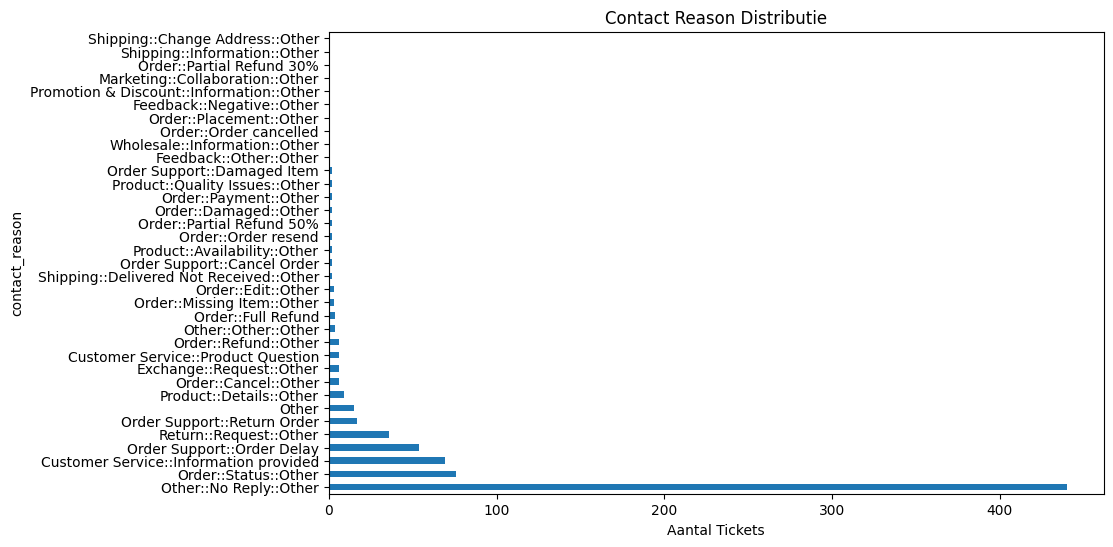

In [3]:
import matplotlib.pyplot as plt

counts = df["contact_reason"].value_counts()
counts.plot(kind="barh", figsize=(10, 6), title="Distributie van Contact Redenen")
plt.xlabel("Aantal Tickets")
plt.title("Contact Reason Distributie")
plt.show()

## Filter relevante categorieen

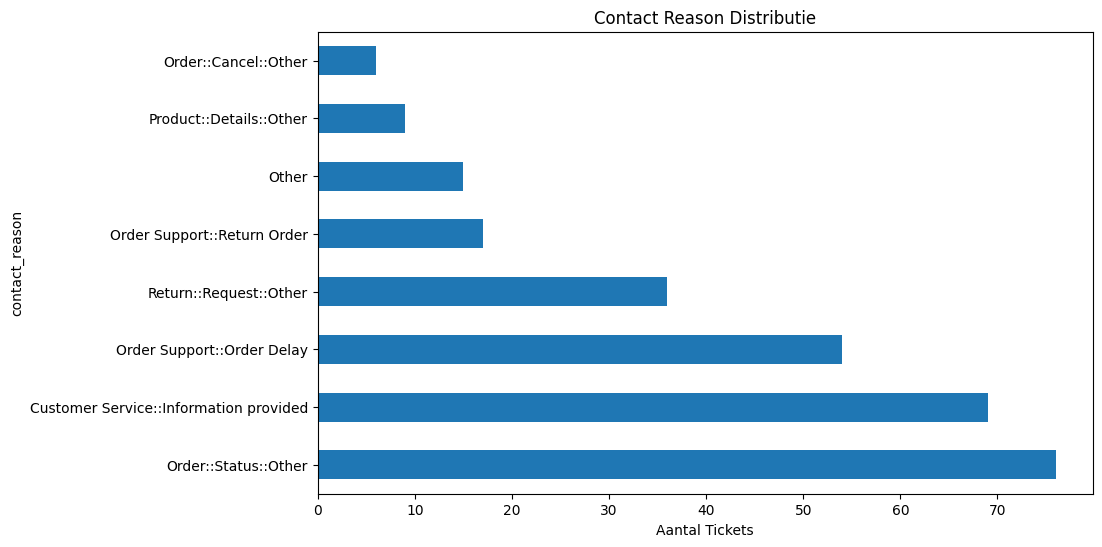

In [4]:
# Categorieen om te behouden
categories = [
    "Order::Status::Other",
    "Customer Service::Information provided",
    "Order Support::Order Delay",
    "Return::Request::Other",
    "Order Support::Return Order",
    "Other",
    "Product::Details::Other",
    "Order::Cancel::Other"
]


# Filter: maak nieuw dataframe met alleen deze categorieën
df_filterd = df[df["contact_reason"].isin(categories)]

# Visualiseer de gefilterde data

import matplotlib.pyplot as plt

counts = df_filterd["contact_reason"].value_counts()
counts.plot(kind="barh", figsize=(10, 6), title="Distributie van Contact Redenen")
plt.xlabel("Aantal Tickets")
plt.title("Contact Reason Distributie")
plt.show()

In [ ]:
# Wat betekende de huidge contact reden
# Logische naam voor de huidige contact reden
# Dictionary waar in staat contact reden met een korte beschrijving
